In [1]:
import pandas as pd
import json

In [2]:
df = pd.read_csv('./data/titanic.csv', sep=',')

In [7]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
shape = {"row" : titanic_df.shape[0], "col" : titanic_df.shape[1]}

In [9]:
result = (titanic_df.isnull().sum(axis=0)/titanic_df.shape[0]).to_json(orient="index")
null_percentage = json.loads(result)

In [10]:
result = titanic_df.describe().to_json(orient="index")
describe_int = json.loads(result)

In [11]:
result = titanic_df.describe(include=[object]).to_json(orient="index")
describe_str = json.loads(result)

In [12]:
dtypes = dict(zip(list(titanic_df.columns), list(map(str, titanic_df.dtypes))))

In [13]:
value_counts = {}
for col in titanic_df.columns:
    tmp = titanic_df[col].value_counts().to_json(orient="index")
    value_counts[col] = json.loads(tmp)

In [14]:
result = {'nullPercentage': null_percentage, 
          'describeInt' : describe_int, 
          'describeStr' : describe_str, 
          'dtypes' : dtypes, 
          'shape': shape,
          'value_counts' : value_counts
         }

In [178]:
with open("./data/titanic.json", "w") as json_file:
    json.dump(result, json_file)

In [15]:
result = titanic_df.describe().to_json(orient="columns")
describe_int = json.loads(result)

In [16]:
result = titanic_df.describe(include=[object]).to_json(orient="columns")
describe_str = json.loads(result)

In [17]:
df_json = {}
describe_list = [describe_int, describe_str]
for describe in describe_list :
    for col in describe.keys():
        if col in df_json.keys():
            for key in describe[col].keys():
                df_json[col][key] = describe[col][key]
        else:
            df_json[col] =  describe[col]

In [19]:
for col in null_percentage:
    df_json[col]["nullPercentage"] = null_percentage[col]

In [20]:
for col in dtypes:
    df_json[col]["dtypes"] = dtypes[col]

In [22]:
for col in value_counts:
    df_json[col]["value_counts"] = value_counts[col]

In [23]:
result_json = {"columns" : df_json, "shape" : shape}
#df_json["shape"] = shape

In [25]:
with open("./data/titanic.json", "w") as json_file:
    json.dump(result_json, json_file)

In [251]:
value_counts = {}
for col in titanic_df.columns:
    tmp = titanic_df[col].value_counts().to_json(orient="index")
    value_counts[col] = json.loads(tmp)

In [258]:
tmp
for k,v in json.loads(tmp).items():
    print(k,v)
    

male 577
female 314


## git에 추가할 새로운 샘플코드

In [4]:
import pandas as pd
import json

df = pd.read_csv('./data/titanic.csv', sep=',')

In [6]:
shape = {"row" : df.shape[0], "col" : df.shape[1]}

In [5]:
get_shape(df)

{'row': 891, 'col': 12}

In [8]:
result = df.describe(include=[object]).to_json(orient="columns")
describe_str = json.loads(result)

In [9]:
df_json = {}
describe_list = [describe_int, describe_str]
for describe in describe_list :
    for col in describe.keys():
        if col in df_json.keys():
            for key in describe[col].keys():
                df_json[col][key] = describe[col][key]
        else:
            df_json[col] =  describe[col]

In [12]:
result = df.isnull().sum(axis=0).to_json(orient="index")
null = json.loads(result)

In [14]:
dtypes = dict(zip(list(df.columns), list(map(str, df.dtypes))))

In [24]:
value_counts = {}
for col in df.columns:
    if len(df[col].unique()) <= 10:
        tmp = df[col].value_counts().to_json(orient="index")
        value_counts[col] = json.loads(tmp)

In [27]:
info_dict = {"null":null, "dtypes":dtypes, "value_counts":value_counts}

for key, value in info_dict.items():
    for col in value:
        df_json[col][key] = value[col]

In [29]:
result_json = {"columns" : df_json, "shape" : shape}

In [32]:
with open("./data/titanic.json", "w") as json_file:
    json.dump(result_json, json_file)

## 함수 적용

In [24]:
import pandas as pd
import json

df = pd.read_csv('./data/titanic.csv', sep=',')

In [25]:
def get_shape(df):
    return {"row" : df.shape[0], "col" : df.shape[1]}

In [26]:
def get_describe(df):
    result = df.describe(include='all').to_json(orient="columns")
    return json.loads(result)

In [27]:
def get_null(df):
    result = df.isnull().sum(axis=0).to_json(orient="index")
    return json.loads(result)

In [28]:
def get_dtypes(df):
    return dict(zip(list(df.columns), list(map(str, df.dtypes))))

In [29]:
def get_value_counts(df):
    value_counts = {}
    for col in df.columns:
        if len(df[col].unique()) <= 10:
            tmp = df[col].value_counts().to_json(orient="index")
            value_counts[col] = json.loads(tmp)
    return value_counts

In [30]:
df_json = {}

In [31]:
describe = get_describe(df)

In [32]:
for col in describe.keys():
    if col in df_json.keys():
        for key in describe[col].keys():
            df_json[col][key] = describe[col][key]
    else:
        df_json[col] =  describe[col]

In [33]:
null = get_null(df)
dtypes = get_dtypes(df)
value_counts = get_value_counts(df)

In [34]:
info_dict = {"null":null, "dtypes":dtypes, "value_counts":value_counts}

for key, value in info_dict.items():
    for col in value.keys():
        df_json[col][key] = value[col]

In [37]:
result_json = {"columns" : df_json, "shape" : shape}

In [38]:
with open("./data/titanic.json", "w") as json_file:
    json.dump(result_json, json_file)

In [7]:
import json

In [1]:
import pandas as pd

In [26]:
df = pd.read_csv("./data/titanic.csv", nrows= 10)

In [34]:
df = df[["PassengerId", "Pclass", "Name"]]

use_list = ["PassengerId", "Pclass", "Name"]
type_list = ["int64","int64","object"]
column_list = ["PassengerId", "Name", "Pclass"]
rename_list = ["PassengerId","Pclass","Name"]

df = df.astype(dict(zip(use_list, type_list)))
df = df[column_list]
column_dict = dict(zip(use_list, rename_list))

df.rename(columns=column_dict)

,PassengerId,Name,Pclass
0,1,"Braund, Mr. Owen Harris",3
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,3,"Heikkinen, Miss. Laina",3
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
4,5,"Allen, Mr. William Henry",3
5,6,"Moran, Mr. James",3
6,7,"McCarthy, Mr. Timothy J",1
7,8,"Palsson, Master. Gosta Leonard",3
8,9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",3
9,10,"Nasser, Mrs. Nicholas (Adele Achem)",2


In [35]:
parsed = df.to_json(orient="records")
result = json.loads(parsed)

In [36]:
parsed

'[{"PassengerId":1,"Name":"Braund, Mr. Owen Harris","Pclass":3},{"PassengerId":2,"Name":"Cumings, Mrs. John Bradley (Florence Briggs Thayer)","Pclass":1},{"PassengerId":3,"Name":"Heikkinen, Miss. Laina","Pclass":3},{"PassengerId":4,"Name":"Futrelle, Mrs. Jacques Heath (Lily May Peel)","Pclass":1},{"PassengerId":5,"Name":"Allen, Mr. William Henry","Pclass":3},{"PassengerId":6,"Name":"Moran, Mr. James","Pclass":3},{"PassengerId":7,"Name":"McCarthy, Mr. Timothy J","Pclass":1},{"PassengerId":8,"Name":"Palsson, Master. Gosta Leonard","Pclass":3},{"PassengerId":9,"Name":"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","Pclass":3},{"PassengerId":10,"Name":"Nasser, Mrs. Nicholas (Adele Achem)","Pclass":2}]'

In [37]:
result

[{'PassengerId': 1, 'Name': 'Braund, Mr. Owen Harris', 'Pclass': 3},
 {'PassengerId': 2,
  'Name': 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
  'Pclass': 1},
 {'PassengerId': 3, 'Name': 'Heikkinen, Miss. Laina', 'Pclass': 3},
 {'PassengerId': 4,
  'Name': 'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
  'Pclass': 1},
 {'PassengerId': 5, 'Name': 'Allen, Mr. William Henry', 'Pclass': 3},
 {'PassengerId': 6, 'Name': 'Moran, Mr. James', 'Pclass': 3},
 {'PassengerId': 7, 'Name': 'McCarthy, Mr. Timothy J', 'Pclass': 1},
 {'PassengerId': 8, 'Name': 'Palsson, Master. Gosta Leonard', 'Pclass': 3},
 {'PassengerId': 9,
  'Name': 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
  'Pclass': 3},
 {'PassengerId': 10,
  'Name': 'Nasser, Mrs. Nicholas (Adele Achem)',
  'Pclass': 2}]

In [100]:
import pandas as pd
import json

In [101]:
df = pd.read_csv("./data/titanic.csv")

In [168]:
def get_shape(df):
    return {"numRow" : df.shape[0], "numCol" : df.shape[1]}


def get_describe(df):
    describe = df.describe(include='all').to_json(orient="columns")
    describe = json.loads(describe)

    default_dict = {'count': None,
                    'unique': None,
                    'top': None,
                    'freq': None,
                    'mean': None,
                    'std': None,
                    'min': None,
                    '25%': None,
                    '50%': None,
                    '75%': None,
                    'max': None}

    result = {}
    for col in describe.keys():
        print(col)
        result[col] = default_dict.copy()
        result[col].update(describe[col])

    return result

def get_null_count(df):
    result = df.isnull().sum(axis=0).to_json(orient="index")
    return json.loads(result)

    # return df.isnull().sum(axis=0).to_dict()

def get_column_type(df):
    return dict(zip(list(df.columns), list(map(str, df.dtypes))))

def get_value_counts(df):
    bins = 10

    value_counts = {}
    for col in df.columns:
        if len(df[col].unique()) <= 10:
            #value_counts[col] = df[col].value_counts().to_dict()
            tmp = df[col].value_counts().to_json(orient="index")
            value_counts[col] = json.loads(tmp)

        elif str(df[col].dtypes).startswith("int") or str(df[col].dtypes).startswith("float"):
            tmp = pd.cut(df[col], bins=bins).value_counts()
            tmp.index = tmp.index.astype("str")
            tmp.index = tmp.index.map(lambda x: x[1:-1].replace(",", " -"))

            tmp = tmp.to_json(orient="index")
            value_counts[col] = json.loads(tmp)

            # value_counts[col] = tmp.to_dict()
        else:
            value_counts[col] = None

    return value_counts

def get_column_info(df):
    shape = get_shape(df)
    describe = get_describe(df)
    null_count = get_null_count(df)
    column_type = get_column_type(df)
    value_count = get_value_counts(df)

    tmp_json = describe

    info_dict = {"nullCount": null_count, "dtype": column_type, "valueCount": value_count}

    for key, value in info_dict.items():
        for col in value.keys():
            tmp_json[col][key] = value[col]

    return {"columnInfo": tmp_json, "shape": shape}

In [169]:
get_column_info(df)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


{'columnInfo': {'PassengerId': {'count': 891.0,
   'unique': None,
   'top': None,
   'freq': None,
   'mean': 446.0,
   'std': 257.3538420152,
   'min': 1.0,
   '25%': 223.5,
   '50%': 446.0,
   '75%': 668.5,
   'max': 891.0,
   'nullCount': 0,
   'dtype': 'int64',
   'valueCount': {'0.11 - 90.0': 90,
    '802.0 - 891.0': 89,
    '713.0 - 802.0': 89,
    '624.0 - 713.0': 89,
    '535.0 - 624.0': 89,
    '446.0 - 535.0': 89,
    '357.0 - 446.0': 89,
    '268.0 - 357.0': 89,
    '179.0 - 268.0': 89,
    '90.0 - 179.0': 89}},
  'Survived': {'count': 891.0,
   'unique': None,
   'top': None,
   'freq': None,
   'mean': 0.3838383838,
   'std': 0.4865924543,
   'min': 0.0,
   '25%': 0.0,
   '50%': 0.0,
   '75%': 1.0,
   'max': 1.0,
   'nullCount': 0,
   'dtype': 'int64',
   'valueCount': {'0': 549, '1': 342}},
  'Pclass': {'count': 891.0,
   'unique': None,
   'top': None,
   'freq': None,
   'mean': 2.3086419753,
   'std': 0.836071241,
   'min': 1.0,
   '25%': 2.0,
   '50%': 3.0,
   '75%':

In [ ]:
describe = df.describe(include='all').to_json(orient="columns")
describe = json.loads(describe)

In [164]:
def get_describe(df):
    describe = df.describe(include='all').to_json(orient="columns")
    describe = json.loads(describe)

    default_dict = {'count': None,
                    'unique': None,
                    'top': None,
                    'freq': None,
                    'mean': None,
                    'std': None,
                    'min': None,
                    '25%': None,
                    '50%': None,
                    '75%': None,
                    'max': None}

    result = {}
    for col in describe.keys():
        result[col] = default_dict.copy()
        result[col].update(describe[col])
        
    return result

In [165]:
get_describe(df)

{'PassengerId': {'count': 891.0,
  'unique': None,
  'top': None,
  'freq': None,
  'mean': 446.0,
  'std': 257.3538420152,
  'min': 1.0,
  '25%': 223.5,
  '50%': 446.0,
  '75%': 668.5,
  'max': 891.0},
 'Survived': {'count': 891.0,
  'unique': None,
  'top': None,
  'freq': None,
  'mean': 0.3838383838,
  'std': 0.4865924543,
  'min': 0.0,
  '25%': 0.0,
  '50%': 0.0,
  '75%': 1.0,
  'max': 1.0},
 'Pclass': {'count': 891.0,
  'unique': None,
  'top': None,
  'freq': None,
  'mean': 2.3086419753,
  'std': 0.836071241,
  'min': 1.0,
  '25%': 2.0,
  '50%': 3.0,
  '75%': 3.0,
  'max': 3.0},
 'Name': {'count': 891,
  'unique': 891,
  'top': 'Weir, Col. John',
  'freq': 1,
  'mean': None,
  'std': None,
  'min': None,
  '25%': None,
  '50%': None,
  '75%': None,
  'max': None},
 'Sex': {'count': 891,
  'unique': 2,
  'top': 'male',
  'freq': 577,
  'mean': None,
  'std': None,
  'min': None,
  '25%': None,
  '50%': None,
  '75%': None,
  'max': None},
 'Age': {'count': 714.0,
  'unique': Non

In [161]:
info_dict = {"valueCount": value_count}

tmp_json = describe

for key, value in info_dict.items():
    for col in value.keys():
        tmp_json[col][key] = value[col]
        print(col ,key, value[col])
        print("======"*10)

PassengerId valueCount {'0.11 - 90.0': 90, '802.0 - 891.0': 89, '713.0 - 802.0': 89, '624.0 - 713.0': 89, '535.0 - 624.0': 89, '446.0 - 535.0': 89, '357.0 - 446.0': 89, '268.0 - 357.0': 89, '179.0 - 268.0': 89, '90.0 - 179.0': 89}
Survived valueCount {'0': 549, '1': 342}
Pclass valueCount {'3': 491, '1': 216, '2': 184}
Name valueCount None
Sex valueCount {'male': 577, 'female': 314}
Age valueCount {'16.336 - 24.294': 177, '24.294 - 32.252': 169, '32.252 - 40.21': 118, '40.21 - 48.168': 70, '0.34 - 8.378': 54, '8.378 - 16.336': 46, '48.168 - 56.126': 45, '56.126 - 64.084': 24, '64.084 - 72.042': 9, '72.042 - 80.0': 2}
SibSp valueCount {'0': 608, '1': 209, '2': 28, '4': 18, '3': 16, '8': 7, '5': 5}
Parch valueCount {'0': 678, '1': 118, '2': 80, '5': 5, '3': 5, '4': 4, '6': 1}
Ticket valueCount None
Fare valueCount {'-0.512 - 51.233': 732, '51.233 - 102.466': 106, '102.466 - 153.699': 31, '204.932 - 256.165': 11, '256.165 - 307.398': 6, '461.096 - 512.329': 3, '153.699 - 204.932': 2, '409

In [103]:
get_column_info(df)

{'columnInfo': {'PassengerId': {'count': 889,
   'unique': 3,
   'top': 'S',
   'freq': 644,
   'mean': None,
   'std': None,
   'min': None,
   '25%': None,
   '50%': None,
   '75%': None,
   'max': None,
   'nullCount': 2,
   'dtype': 'object',
   'valueCount': {'S': 644, 'C': 168, 'Q': 77}},
  'Survived': {'count': 889,
   'unique': 3,
   'top': 'S',
   'freq': 644,
   'mean': None,
   'std': None,
   'min': None,
   '25%': None,
   '50%': None,
   '75%': None,
   'max': None,
   'nullCount': 2,
   'dtype': 'object',
   'valueCount': {'S': 644, 'C': 168, 'Q': 77}},
  'Pclass': {'count': 889,
   'unique': 3,
   'top': 'S',
   'freq': 644,
   'mean': None,
   'std': None,
   'min': None,
   '25%': None,
   '50%': None,
   '75%': None,
   'max': None,
   'nullCount': 2,
   'dtype': 'object',
   'valueCount': {'S': 644, 'C': 168, 'Q': 77}},
  'Name': {'count': 889,
   'unique': 3,
   'top': 'S',
   'freq': 644,
   'mean': None,
   'std': None,
   'min': None,
   '25%': None,
   '50%': N

In [171]:
get_value_counts(df[["Age"]])

{'Age': {'16.336 - 24.294': 177,
  '24.294 - 32.252': 169,
  '32.252 - 40.21': 118,
  '40.21 - 48.168': 70,
  '0.34 - 8.378': 54,
  '8.378 - 16.336': 46,
  '48.168 - 56.126': 45,
  '56.126 - 64.084': 24,
  '64.084 - 72.042': 9,
  '72.042 - 80.0': 2}}

In [174]:
df["Age"].hist

<bound method hist_series of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>

<AxesSubplot:>

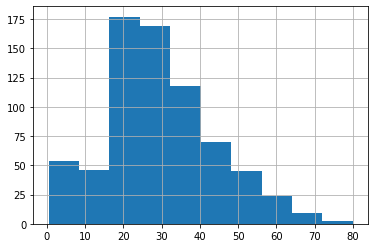

In [181]:
df["Age"].hist(bins = 10)